<a href="https://colab.research.google.com/github/iamdas3/Machine-Learning/blob/master/200_Birds_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir .kaggle

In [2]:
import json
token = {'username':'trideepdas42291','key':'6a1a0886f367c6d9302074aa0917d240'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.18G/1.19G [00:16<00:00, 103MB/s] 
100% 1.19G/1.19G [00:16<00:00, 78.2MB/s]


In [7]:
import os
import zipfile

local_zip = '/content/100-bird-species.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/valid/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [9]:
pretrained_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=[224,224, 3]
)
pretrained_model.trainable = False
    
model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
    pretrained_model,
        # ... attach a new head to act as a classifier.
        #tf.keras.layers.Conv2D(512, [3,3], activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Conv2D(512, [3,3], activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512, activation='relu'),

        #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(200, activation='softmax')
])
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics=['accuracy'],
)

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
Total params: 22,212,584
Trainable params: 409,800
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=27503//128, validation_data = validation_generator, verbose = 1, validation_steps=1000//32)

Epoch 1/10
215/214 [==============================] - 386s 2s/step - loss: 2.0368 - accuracy: 0.5369 - val_loss: 0.7325 - val_accuracy: 0.8220
Epoch 2/10
215/214 [==============================] - 379s 2s/step - loss: 1.0431 - accuracy: 0.7296 - val_loss: 0.5523 - val_accuracy: 0.8560
Epoch 3/10
215/214 [==============================] - 376s 2s/step - loss: 0.8653 - accuracy: 0.7688 - val_loss: 0.4526 - val_accuracy: 0.8720
Epoch 4/10
215/214 [==============================] - 374s 2s/step - loss: 0.7565 - accuracy: 0.7933 - val_loss: 0.4028 - val_accuracy: 0.8860
Epoch 5/10
215/214 [==============================] - 371s 2s/step - loss: 0.7053 - accuracy: 0.8054 - val_loss: 0.3700 - val_accuracy: 0.8960
Epoch 6/10
215/214 [==============================] - 366s 2s/step - loss: 0.6603 - accuracy: 0.8169 - val_loss: 0.3429 - val_accuracy: 0.9130
Epoch 7/10
215/214 [==============================] - 362s 2s/step - loss: 0.6218 - accuracy: 0.8264 - val_loss: 0.3159 - val_accuracy: 0.9160

In [11]:
model.save("/tmp/200_birds_model_InceptionV3.h5")

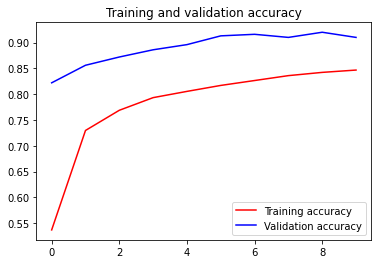

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [13]:
TESTING_DIR = "/tmp/test/"
testing_datagen = ImageDataGenerator(rescale = 1./255)
testing_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 1000 images belonging to 200 classes.


In [14]:
model.evaluate(testing_generator, steps=1000//32, verbose=1)

31/31 [==============================] - 5s 154ms/step - loss: 0.2214 - accuracy: 0.9325


[0.22136884927749634, 0.9324596524238586]

In [15]:
from google.colab import files
files.download('/tmp/200_birds_model_InceptionV3.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>